In [1]:
#imports
import pandas as pd
import numpy as np

#plotting libraries
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


Data preprocessing

In [2]:
#open data and read into df
file_path = './archive/tweets.csv'
tweet_df = pd.read_csv(file_path)
tweet_df.head()


,name,username,description,location,followers,numberstatuses,time,tweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:27,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:29,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:37,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:45,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...


In [3]:
#create a dataframe with one entry per user, to not confound the number of tweets with the analysis on other vars
#keep only first duplicate value
unique_user_df = tweet_df.drop_duplicates(subset=['username'])
unique_user_df.head()

,name,username,description,location,followers,numberstatuses,time,tweets
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,1/6/2015 21:07,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...
29,Abu Layth Al Hindi,AbuLaythAlHindi,Kik: abulayth2014. Ex South African. Currently...,Islamic State,68,18,7/7/2015 6:02,‍‌‌‌‌‍‌‌‌🔻‌‌[ الإثنين 1436/9/19 هـ ]‍‌‌‌‌‍‍‍‍...
31,ابو الدرداء #خلافة,YazeedDhardaa25,Observing a JIHAD NEWS mainly about Islamic St...,NaN,904,127,8/26/2015 17:23,Salamu Alaykum. I'm back. Do supports and spre...
33,abu baker aldimashqi,abubakerdimshqi,NaN,NaN,112,273,8/28/2015 23:08,"best generation ever, TAKBIRRR #IS #Dawlah #cu..."
45,IS_BAQIYA,BaqiyaIs,NaN,NaN,25,471,8/30/2015 10:23,report JN tells their fighters they won't part...


All tweets in the dataframe were posted by accounts that were stated to be fans of ISIS. We can evaluate what is common: what does the distribution of values for statuses, post times and followers look like, what names or partial names are common. Do we have many locations?

Analysis

In [11]:
#we can use the df with all tweets to obtain unique user locations
tweet_df.location.unique()

array([nan, 'Islamic State', 'München, Deutschland', "Male'. Maldives.",
       'Dunya', 'Wilayat Hadramaut', 'EU', 'Among The Muslims', '.',
       'S.Wazirstan|Mahsud not a Wazir', 'England, United Kingdom',
       'yamin, yasār raqum ١٤', 'أسير الدنيا', 'Read my blog',
       'Antas, Bahia', 'world', 'Wilayah Twitter',
       'اُمتِ مُسلمہ ولایت کشمیر', 'United States',
       '28th Street, Qamar Precint', "Don't need to know",
       'Punch, Jammu And Kashmir', 'Prison ( Darul Kufr )',
       'Amsterdam, The Netherlands', 'Dar Al Kufr', 'Gaziantep, Turkey',
       'Worldwide contributions', 'Texas, USA', 'AP', 'Nowhere',
       '40+Suspension for the truth!', 'Geneva, Switzerland',
       'Wilayah Kashmir', 'سرت\u200e Sirte', 'Earth', 'Middle of Nowhere',
       'Among mushrikeen', 'Guetto', 'Ghurabā', 'Lake City, GA',
       'darl mushrequeen', 'Singaparna, Indonesia', 'Germany',
       'dar al-kufr', 'I hate snitches',
       'Bandar Seri Begawan, Negara Brunei Darussalam', 'خارج

In [7]:
#analyze user df for followers and statuses
print(unique_user_df.describe())

          followers  numberstatuses
count    112.000000      112.000000
mean     767.321429     1304.794643
std     2851.561883     4632.799475
min       16.000000        1.000000
25%       87.500000       42.750000
50%      210.500000      113.000000
75%      642.750000      336.750000
max    29209.000000    32875.000000


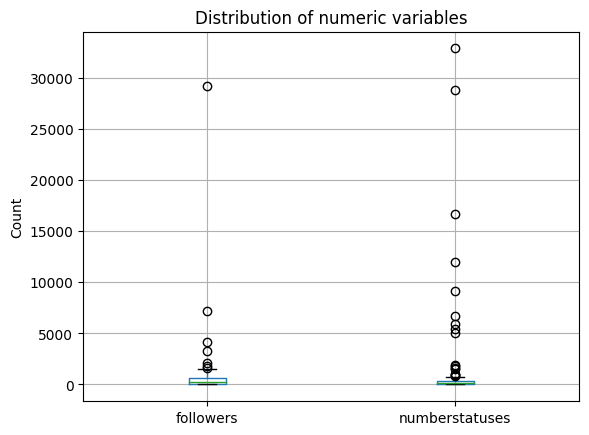

In [39]:
#more detailed look at the distribution
unique_user_df.boxplot()
plt.title('Distribution of numeric variables')
plt.ylabel('Count')
plt.show()

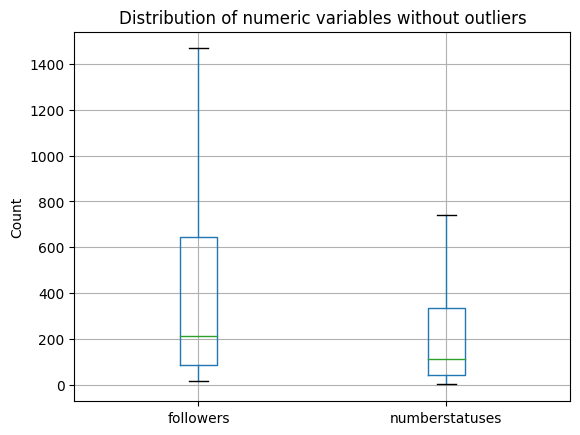

In [38]:
#distribution without outliers
unique_user_df.boxplot(showfliers=False)
plt.title('Distribution of numeric variables without outliers')
plt.ylabel('Count')
plt.show()

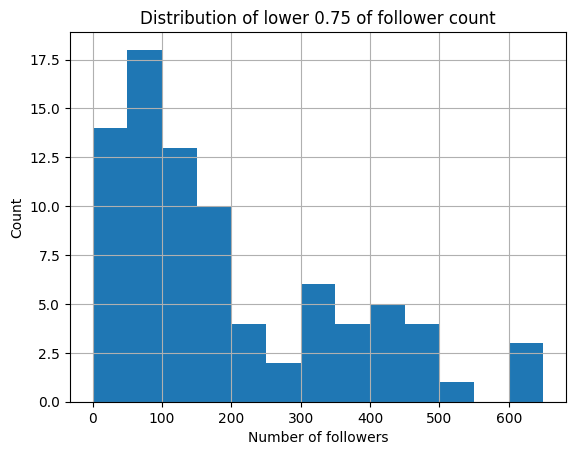

In [37]:
#focus on the distribution of the lower 75% of the number of followers
unique_user_df['followers'].hist(bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650])
plt.title('Distribution of lower 0.75 of follower count')
plt.xlabel('Number of followers')
plt.ylabel('Count')
plt.show()

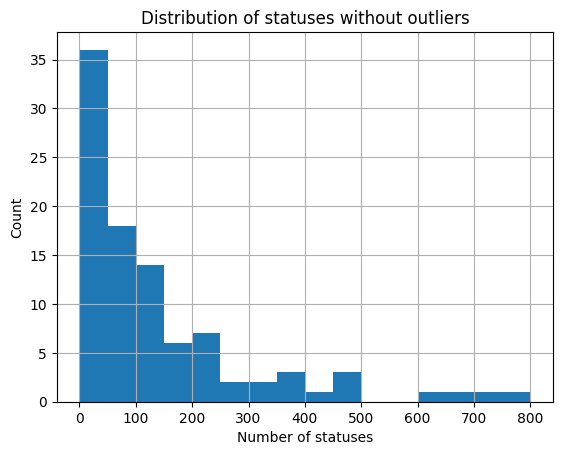

In [36]:
#focus on the distribution of the number of statuses
unique_user_df['numberstatuses'].hist(bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 
                                              500, 550, 600, 650, 700, 750, 800])
plt.title('Distribution of statuses without outliers')
plt.xlabel('Number of statuses')
plt.ylabel('Count')
plt.show()

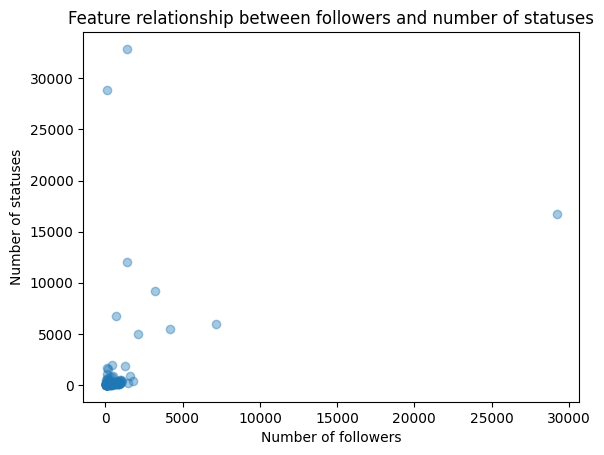

In [34]:
#check feature relationship between followers and number of statuses
plt.scatter(unique_user_df['followers'], unique_user_df['numberstatuses'], alpha=0.4) 
plt.title('Feature relationship between followers and number of statuses')
plt.xlabel('Number of followers')
plt.ylabel('Number of statuses')
plt.show()

In [31]:
#create df without outliers
follower_outlier_bool = unique_user_df['followers'] <= 1450
statusses_outlier_bool = unique_user_df['numberstatuses'] <= 800
no_outlier_df = unique_user_df[follower_outlier_bool]
no_outlier_df = unique_user_df[statusses_outlier_bool]

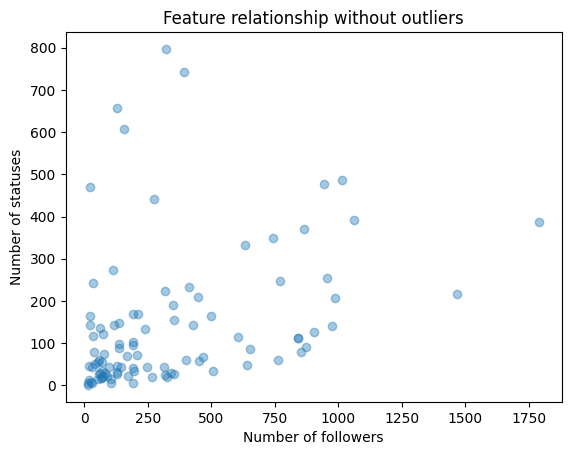

In [35]:
#focus on the feature relationship without outliers
plt.scatter(no_outlier_df['followers'], no_outlier_df['numberstatuses'], alpha=0.4) 
plt.title('Feature relationship without outliers')
plt.xlabel('Number of followers')
plt.ylabel('Number of statuses')
plt.show()